# Lab | Pandas

In this lab, we will be working with the customer data from an insurance company, which can be found in the CSV file located at the following link: https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv

The data includes information such as customer ID, state, gender, education, income, and other variables that can be used to perform various analyses.

Throughout the lab, we will be using the pandas library in Python to manipulate and analyze the data. Pandas is a powerful library that provides various data manipulation and analysis tools, including the ability to load and manipulate data from a variety of sources, including CSV files.

### Data Description

- Customer - Customer ID

- ST - State where customers live

- Gender - Gender of the customer

- Education - Background education of customers 

- Customer Lifetime Value - Customer lifetime value(CLV) is the total revenue the client will derive from their entire relationship with a customer. In other words, is the predicted or calculated value of a customer over their entire duration as a policyholder with the insurance company. It is an estimation of the net profit that the insurance company expects to generate from a customer throughout their relationship with the company. Customer Lifetime Value takes into account factors such as the duration of the customer's policy, premium payments, claim history, renewal likelihood, and potential additional services or products the customer may purchase. It helps insurers assess the long-term profitability and value associated with retaining a particular customer.

- Income - Customers income

- Monthly Premium Auto - Amount of money the customer pays on a monthly basis as a premium for their auto insurance coverage. It represents the recurring cost that the insured person must pay to maintain their insurance policy and receive coverage for potential damages, accidents, or other covered events related to their vehicle.

- Number of Open Complaints - Number of complaints the customer opened

- Policy Type - There are three type of policies in car insurance (Corporate Auto, Personal Auto, and Special Auto)

- Vehicle Class - Type of vehicle classes that customers have Two-Door Car, Four-Door Car SUV, Luxury SUV, Sports Car, and Luxury Car

- Total Claim Amount - the sum of all claims made by the customer. It represents the total monetary value of all approved claims for incidents such as accidents, theft, vandalism, or other covered events.


External Resources: https://towardsdatascience.com/filtering-data-frames-in-pandas-b570b1f834b9

## Challenge 1: Understanding the data

In this challenge, you will use pandas to explore a given dataset. Your task is to gain a deep understanding of the data by analyzing its characteristics, dimensions, and statistical properties.

- Identify the dimensions of the dataset by determining the number of rows and columns it contains.
- Determine the data types of each column and evaluate whether they are appropriate for the nature of the variable. You should also provide suggestions for fixing any incorrect data types.
- Identify the number of unique values for each column and determine which columns appear to be categorical. You should also describe the unique values of each categorical column and the range of values for numerical columns, and give your insights.
- Compute summary statistics such as mean, median, mode, standard deviation, and quartiles to understand the central tendency and distribution of the data for numerical columns. You should also provide your conclusions based on these summary statistics.
- Compute summary statistics for categorical columns and providing your conclusions based on these statistics.

In [1]:
# Importing numpy and pandas
import numpy as np
import pandas as pd

In [3]:
# Identify the dimensions of the dataset by determining the number of rows and columns it contains.
df = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv")


In [6]:
df.head()

,Customer,ST,GENDER,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323


In [7]:
df.tail()

,Customer,ST,GENDER,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
4003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.index

RangeIndex(start=0, stop=4008, step=1)

In [57]:
 #list(df.index)

In [58]:
df.columns

Index(['Customer', 'ST', 'GENDER', 'Education', 'Customer Lifetime Value',
       'Income', 'Monthly Premium Auto', 'Number of Open Complaints',
       'Policy Type', 'Vehicle Class', 'Total Claim Amount'],
      dtype='object')

In [59]:
list(df.columns) # Here just vieuwing it as a list/vertical

['Customer',
 'ST',
 'GENDER',
 'Education',
 'Customer Lifetime Value',
 'Income',
 'Monthly Premium Auto',
 'Number of Open Complaints',
 'Policy Type',
 'Vehicle Class',
 'Total Claim Amount']

In [13]:
df.describe()

,Income,Monthly Premium Auto,Total Claim Amount
count,1071.000000,1071.000000,1071.000000
mean,39295.701214,193.234360,404.986909
std,30469.427060,1601.190369,293.027260
min,0.000000,61.000000,0.382107
25%,14072.000000,68.000000,202.157702
50%,36234.000000,83.000000,354.729129
75%,64631.000000,109.500000,532.800000
max,99960.000000,35354.000000,2893.239678


In [14]:
df.shape # Reviewing here how many rows and columns the dataset has.

(4008, 11)

In [15]:
df.info

<bound method DataFrame.info of      Customer          ST GENDER             Education  \
0     RB50392  Washington    NaN                Master   
1     QZ44356     Arizona      F              Bachelor   
2     AI49188      Nevada      F              Bachelor   
3     WW63253  California      M              Bachelor   
4     GA49547  Washington      M  High School or Below   
...       ...         ...    ...                   ...   
4003      NaN         NaN    NaN                   NaN   
4004      NaN         NaN    NaN                   NaN   
4005      NaN         NaN    NaN                   NaN   
4006      NaN         NaN    NaN                   NaN   
4007      NaN         NaN    NaN                   NaN   

     Customer Lifetime Value   Income  Monthly Premium Auto  \
0                        NaN      0.0                1000.0   
1                 697953.59%      0.0                  94.0   
2                1288743.17%  48767.0                 108.0   
3                 7

In [44]:
df.dtypes # Here I am reviewing all the data types per column

Customer                      object
ST                            object
GENDER                        object
Education                     object
Customer Lifetime Value       object
Income                       float64
Monthly Premium Auto         float64
Number of Open Complaints     object
Policy Type                   object
Vehicle Class                 object
Total Claim Amount           float64
dtype: object

In [40]:
df.nunique() # Reviewing here the unique values per column

Customer                     1071
ST                              8
GENDER                          5
Education                       6
Customer Lifetime Value      1027
Income                        774
Monthly Premium Auto          132
Number of Open Complaints       6
Policy Type                     3
Vehicle Class                   6
Total Claim Amount            761
dtype: int64

In [41]:
df.GENDER.unique()

array([nan, 'F', 'M', 'Femal', 'Male', 'female'], dtype=object)

In [38]:
df.ST.unique()

array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon', 'Cali',
       'AZ', 'WA', nan], dtype=object)

In [39]:
df.Education.unique()

array(['Master', 'Bachelor', 'High School or Below', 'College',
       'Bachelors', 'Doctor', nan], dtype=object)

In [48]:
# Identify the number of unique values for each column and determine which columns appear to be categorical. You should also describe the unique values of each categorical column and the range of values for numerical columns, and give your insights.

unique_counts = df.nunique() # Identify the number of unique values for each column
print("\nUnique value counts per column: ")
print(unique_counts)


Unique value counts per column: 
Customer                     1071
ST                              8
GENDER                          5
Education                       6
Customer Lifetime Value      1027
Income                        774
Monthly Premium Auto          132
Number of Open Complaints       6
Policy Type                     3
Vehicle Class                   6
Total Claim Amount            761
dtype: int64


In [97]:
category_corrections = {
    "Femal": "Female",
    "female": "Female",
    "F": "Female", 
    "Male": "M",
    "WA": "Washington",
    "AZ": "Arizona",
    "Cali": "California",
    "Bachelors": "Bachelor"    
}
# Applying corrrections to the relevant columns
for col in["GENDER", "ST", "Education"]: 
    df[col] = df[col].replace(category_corrections)

In [101]:
# Determine categorical and numerical colums
categorical_columns = [col for col in df.columns if df[col].dtype == "object" or unique_counts[col] <15]
numerical_columns = [col for col in df.columns if df[col].dtype in ["float64", "int64"] and col not in categorical_columns]
print("\nCategorical Columns:", categorical_columns)
print("\nNumerical Columns: ", numerical_columns)


Categorical Columns: ['Customer', 'ST', 'GENDER', 'Education', 'Customer Lifetime Value', 'Number of Open Complaints', 'Policy Type', 'Vehicle Class']

Numerical Columns:  ['Income', 'Monthly Premium Auto', 'Total Claim Amount']


In [102]:
df.values #The unique values 

array([['RB50392', 'Washington', nan, ..., 'Personal Auto',
        'Four-Door Car', 2.704934],
       ['QZ44356', 'Arizona', 'Female', ..., 'Personal Auto',
        'Four-Door Car', 1131.464935],
       ['AI49188', 'Nevada', 'Female', ..., 'Personal Auto',
        'Two-Door Car', 566.472247],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=object)

In [103]:
#Describe unique values for categorical columns 
print("\nUnique values for categorical columns: ")
for col in categorical_columns: 
    print(f"nColumn: {col}")
    print(df[col].unique())


Unique values for categorical columns: 
nColumn: Customer
['RB50392' 'QZ44356' 'AI49188' ... 'CW49887' 'MY31220' nan]
nColumn: ST
['Washington' 'Arizona' 'Nevada' 'California' 'Oregon' nan]
nColumn: GENDER
[nan 'Female' 'M']
nColumn: Education
['Master' 'Bachelor' 'High School or Below' 'College' 'Doctor' nan]
nColumn: Customer Lifetime Value
[nan '697953.59%' '1288743.17%' ... '2031499.76%' '323912.47%'
 '899704.02%']
nColumn: Number of Open Complaints
['1/0/00' '1/2/00' '1/1/00' '1/3/00' '1/5/00' '1/4/00' nan]
nColumn: Policy Type
['Personal Auto' 'Corporate Auto' 'Special Auto' nan]
nColumn: Vehicle Class
['Four-Door Car' 'Two-Door Car' 'SUV' 'Luxury SUV' 'Sports Car'
 'Luxury Car' nan]


In [110]:
df.describe(include="all")

,Customer,ST,GENDER,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
count,1071,1071,954,1071,1068,1071.000000,1071.000000,1071,1071,1071,1071.000000
unique,1071,5,2,5,1027,NaN,NaN,6,3,6,NaN
top,RB50392,California,Female,Bachelor,445811.34%,NaN,NaN,1/0/00,Personal Auto,Four-Door Car,NaN
freq,1,331,502,331,4,NaN,NaN,830,780,576,NaN
mean,NaN,NaN,NaN,NaN,NaN,39295.701214,193.234360,NaN,NaN,NaN,404.986909
std,NaN,NaN,NaN,NaN,NaN,30469.427060,1601.190369,NaN,NaN,NaN,293.027260
min,NaN,NaN,NaN,NaN,NaN,0.000000,61.000000,NaN,NaN,NaN,0.382107
25%,NaN,NaN,NaN,NaN,NaN,14072.000000,68.000000,NaN,NaN,NaN,202.157702
50%,NaN,NaN,NaN,NaN,NaN,36234.000000,83.000000,NaN,NaN,NaN,354.729129
75%,NaN,NaN,NaN,NaN,NaN,64631.000000,109.500000,NaN,NaN,NaN,532.800000


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4008 entries, 0 to 4007
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer                   1071 non-null   object 
 1   ST                         1071 non-null   object 
 2   GENDER                     954 non-null    object 
 3   Education                  1071 non-null   object 
 4   Customer Lifetime Value    1068 non-null   object 
 5   Income                     1071 non-null   float64
 6   Monthly Premium Auto       1071 non-null   float64
 7   Number of Open Complaints  1071 non-null   object 
 8   Policy Type                1071 non-null   object 
 9   Vehicle Class              1071 non-null   object 
 10  Total Claim Amount         1071 non-null   float64
dtypes: float64(3), object(8)
memory usage: 344.6+ KB


In [113]:
# Get min-max range for numerical columns 
print("\nRange of values for numerical columns: ")
for col in numerical_columns:
    print(f"{col}: Min = {df[col].min()}, Max = {df[col].max()}")



Range of values for numerical columns: 
Income: Min = 0.0, Max = 99960.0
Monthly Premium Auto: Min = 61.0, Max = 35354.0
Total Claim Amount: Min = 0.382107, Max = 2893.239678


In [114]:
# Discrete numerical values with fewer than 15 unique values often represent categories rather than continuous numbers.

#Providing insights based on unique value distribution
print("\n--- Insights ---")

#Checking for high-cardinality categorical columns
for col in categorical_columns: 
    if unique_counts[col] >10: #The threshold of 10 unique values is an arbitrary rule of thumb used to detect high-cardinality categorical columns.
        print(f"-Column '{col} has a high number of unique categories ({unique_counts[col]}). Consider encoding methods like target or frequency condition.") 

#Checking for potential categorical columns stored as numbers 
for col in numerical_columns:
    if unique_counts[col] <15: 
        print(f"Column '{col}' is numerical but has only {unique_counts[col]} unique values. This might be categorical. ")

#Checking for missing or suspicious values 
missing_values = df.isna().sum()
for col in df.columns: 
    if missing_values[col] >0: 
        print(f"- Column '{col}' has {missing_values[col]} missing values. Consider handling them appropriatly.")

print("\nThis was the analysis!")


--- Insights ---
-Column 'Customer has a high number of unique categories (1071). Consider encoding methods like target or frequency condition.
-Column 'Customer Lifetime Value has a high number of unique categories (1027). Consider encoding methods like target or frequency condition.
- Column 'Customer' has 2937 missing values. Consider handling them appropriatly.
- Column 'ST' has 2937 missing values. Consider handling them appropriatly.
- Column 'GENDER' has 3054 missing values. Consider handling them appropriatly.
- Column 'Education' has 2937 missing values. Consider handling them appropriatly.
- Column 'Customer Lifetime Value' has 2940 missing values. Consider handling them appropriatly.
- Column 'Income' has 2937 missing values. Consider handling them appropriatly.
- Column 'Monthly Premium Auto' has 2937 missing values. Consider handling them appropriatly.
- Column 'Number of Open Complaints' has 2937 missing values. Consider handling them appropriatly.
- Column 'Policy Type'

In [115]:
# Compute summary statistics such as mean, median, mode, standard deviation, and quartiles to understand the central tendency and distribution of the data for numerical columns. You should also provide your conclusions based on these summary statistics.

print("\n--- Summary ---")

#numerical_columns = [col for col in df.columns if df[col].dtype in ["int64", "float"]], I already have defined all the numerical columns with this code. 

summary = df[numerical_columns].agg(["mean", "median", lambda x: x.mode()[0]])
summary.rename(index={summary.index[2]: "mode"}, inplace=True)
print(summary)

print("\nEnd of Summary!")


--- Summary ---
              Income  Monthly Premium Auto  Total Claim Amount
mean    39295.701214             193.23436          404.986909
median  36234.000000              83.00000          354.729129
mode        0.000000              65.00000          321.600000

End of Summary!


Conclusions Based on the Summary Statistics:

1. Income Analysis: 
Mean: 39295
Median: 36234
Mode: 0.00

Insights: 
- The mean income is higher than the median. However, the most frequent income is 0.00. So there are customers who have very high incomes, pulling the average up. 
- The mode is 0.00, which is unusual and can indicate the following: 
    - Missing or incorrect values encoded as 0. 
    - Many customers with no recorded income. 
    - The dataset includes unemployed individuals or students. 

2. Monthly Premium Auto (Car Insurance Premiums)
Mean: 193.23
Median: 83.00
Mode: 65.00

Insights: 
- The mean is significantly  higher tham the median. 
- Most common premium is 65.00, which means customers pay a lower amount, but a few very high premiums.
    - A few customers have very expensive insurance plans. 
    - Some premium values might be outliers. 

3. Total Claim Amount (Payouts for Insurance Claims)
Mean: 404.99
Median: 354.73
Mode: 321.60

Insights: 
- The mean is slightly higher than the median.
- Most frequent claim is 321.60, which suggest that small claims are common. 
- The median and mode are close, which suggest a fair balanced distribution. 

Next steps: 
- Identify and check for outliers.
- Investigate how many customers have a 0.00 income.
- Consider log tranformation if the skewness is too high. 
- Investigate potetial high-value claims to see if they are valid or outliers.
- Plot a histogram to check the claim distribution


In [116]:
#Investigate how many customers have a 0.00 income.
print("Amount of missing income values:", df["Income"].value_counts()[0])

Amount of missing income values: 252


In [117]:
#Identify and check for outliers.
df["Monthly Premium Auto"].describe()

count     1071.000000
mean       193.234360
std       1601.190369
min         61.000000
25%         68.000000
50%         83.000000
75%        109.500000
max      35354.000000
Name: Monthly Premium Auto, dtype: float64

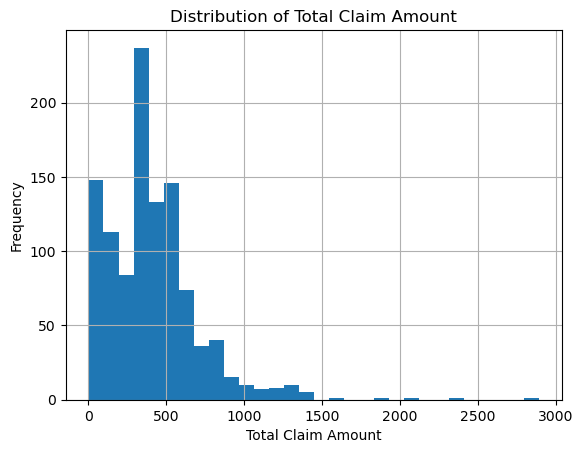

In [118]:
# Plot a histogram to check the claim distribution

import matplotlib.pyplot as plt
df["Total Claim Amount"].hist(bins=30)
plt.xlabel("Total Claim Amount")
plt.ylabel("Frequency")
plt.title("Distribution of Total Claim Amount")
plt.show()

In [119]:
#Another way to do the summary: 

mean_values = df[numerical_columns].mean()
print("\nMean:\n", mean_values)

median_values = df[numerical_columns].median()
print("\nMedian:\n", median_values)

mode_values = df[numerical_columns].mode().iloc[0]
print("\nMode:\n", mode_values)


Mean:
 Income                  39295.701214
Monthly Premium Auto      193.234360
Total Claim Amount        404.986909
dtype: float64

Median:
 Income                  36234.000000
Monthly Premium Auto       83.000000
Total Claim Amount        354.729129
dtype: float64

Mode:
 Income                    0.0
Monthly Premium Auto     65.0
Total Claim Amount      321.6
Name: 0, dtype: float64


In [121]:
# Compute summary statistics for categorical columns and providing your conclusions based on these statistics.

print("\n--- Categorical Summary ---")

# Create a summary DataFrame
categorical_summary = pd.DataFrame({
    "Unique Categories": [df[col].nunique() for col in categorical_columns],
    "Most Frequent Category": [df[col].mode()[0] for col in categorical_columns],
    "Most Frequent Count": [df[col].value_counts().iloc[0] for col in categorical_columns]
}, index=categorical_columns)

print(categorical_summary)

#To get a more detailed breakdown, looping through each categorical column:
for col in categorical_columns: 
    print(f"\nColumn: {col}")
    print(df[col].value_counts(normalize=True) *100)

print("\nEnd of Categorical Summary!")



--- Categorical Summary ---
                           Unique Categories Most Frequent Category  \
Customer                                1071                AA71604   
ST                                         5             California   
GENDER                                     2                 Female   
Education                                  5               Bachelor   
Customer Lifetime Value                 1027             251459.20%   
Number of Open Complaints                  6                 1/0/00   
Policy Type                                3          Personal Auto   
Vehicle Class                              6          Four-Door Car   

                           Most Frequent Count  
Customer                                     1  
ST                                         331  
GENDER                                     502  
Education                                  331  
Customer Lifetime Value                      4  
Number of Open Complaints            

## Challenge 2: analyzing the data

### Exercise 1

The marketing team wants to know the top 5 less common customer locations. Create a pandas Series object that contains the customer locations and their frequencies, and then retrieve the top 5 less common locations in ascending order.

In [123]:
# Location Counts

location_counts = df["ST"].value_counts()

leads_common_locations = location_counts.nsmallest(5)

print(leads_common_locations)

ST
Nevada         98
Washington    111
Arizona       211
Oregon        320
California    331
Name: count, dtype: int64


### Exercise 2

The sales team wants to know the total number of policies sold for each type of policy. Create a pandas Series object that contains the policy types and their total number of policies sold, and then retrieve the policy type with the highest number of policies sold.

*Hint:*
- *Using value_counts() method simplifies this analysis.*
- *Futhermore, there is a method that returns the index of the maximum value in a column or row.*


In [127]:
# Your code here
policy_counts = df["Policy Type"].value_counts()
top_policy_type = policy_counts.idxmax() #Gets the policy type with the highest count
top_policy_count = policy_counts.max() #Gets the highest count

print("Total policies sold per policy type:\n", policy_counts)
print(f"\nThe Policy type with the highest number of policies sold is '{top_policy_type}' with {top_policy_count} policies in total.")


Total policies sold per policy type:
 Policy Type
Personal Auto     780
Corporate Auto    234
Special Auto       57
Name: count, dtype: int64

The Policy type with the highest number of policies sold is 'Personal Auto' with 780 policies.


### Exercise 3

The sales team wants to know if customers with Personal Auto have a lower income than those with Corporate Auto. How does the average income compare between the two policy types?

- Use *loc* to create two dataframes: one containing only Personal Auto policies and one containing only Corporate Auto policies.
- Calculate the average income for each policy.
- Print the results.

In [ ]:
# Your code here

### Bonus: Exercise 4


Your goal is to identify customers with a high policy claim amount.

Instructions:

- Review again the statistics for total claim amount to gain an understanding of the data.
- To identify potential areas for improving customer retention and profitability, we want to focus on customers with a high policy claim amount. Consider customers with a high policy claim amount to be those in the top 25% of the total claim amount. Create a pandas DataFrame object that contains information about customers with a policy claim amount greater than the 75th percentile.
- Use DataFrame methods to calculate summary statistics about the high policy claim amount data. 

*Note: When analyzing data, we often want to focus on certain groups of values to gain insights. Percentiles are a useful tool to help us define these groups. A percentile is a measure that tells us what percentage of values in a dataset are below a certain value. For example, the 75th percentile represents the value below which 75% of the data falls. Similarly, the 25th percentile represents the value below which 25% of the data falls. When we talk about the top 25%, we are referring to the values that fall above the 75th percentile, which represent the top quarter of the data. On the other hand, when we talk about the bottom 25%, we are referring to the values that fall below the 25th percentile, which represent the bottom quarter of the data. By focusing on these groups, we can identify patterns and trends that may be useful for making decisions and taking action.*

*Hint: look for a method that gives you the percentile or quantile 0.75 and 0.25 for a Pandas Series.*

*Hint 2: check `Boolean selection according to the values of a single column` in https://towardsdatascience.com/filtering-data-frames-in-pandas-b570b1f834b9*

In [ ]:
# Your code here